## AG - Port: Earth Quake Data Analysis

<div><img src="https://www.amnh.org/var/ezflow_site/storage/images/media/amnh/images/explore/ology-images/super-article-imagery/earthquakes-tremors-from-below-imagery/earthquake-lead/4604593-3-eng-US/earthquake-lead.jpg" width=500 /></div>

In [2]:
#Linear algebra
import numpy as np
#Data processing
import pandas as pd
#Data visualisation
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)
#static images of plots embedded in this notebook
%matplotlib inline

> Let's Import the cleaned excel eata to further clean and explore in Python 


In [3]:
df = pd.read_excel('Data Set - Earthquakes.xlsx',  na_values = ['\xa0'])

> Obsevation: The columns are not in thier appropriate Datatype, Let's Work on that.

> Let's Handle the missing values present in the data 

In [4]:
df.isnull().sum()

Date                         0
Tsu                       1693
Vol                       2184
Location Name                0
Country                      0
Latitude                     1
Longitude                    1
Focal Depth (km)            19
Mag                          6
MMI Int                   1380
Deaths                    1246
Missing                   2181
Injuries                  1122
Damage ($Mil)             1783
Houses Destroyed          1690
Houses Damaged            1738
Total Deaths              1230
Total Missing             2179
Total Injuries            1117
Total Damage ($Mil)       1783
Total Houses Destroyed    1682
Total Houses Damaged      1771
dtype: int64

In [5]:
df.shape

(2204, 22)

#### Detecting missing data visually
- To graphically analyse the missingness of the data, let's use a library called Missingno.it is a package for graphical analysis of missing values. To use this library, we need to import it as follows:

<AxesSubplot:>

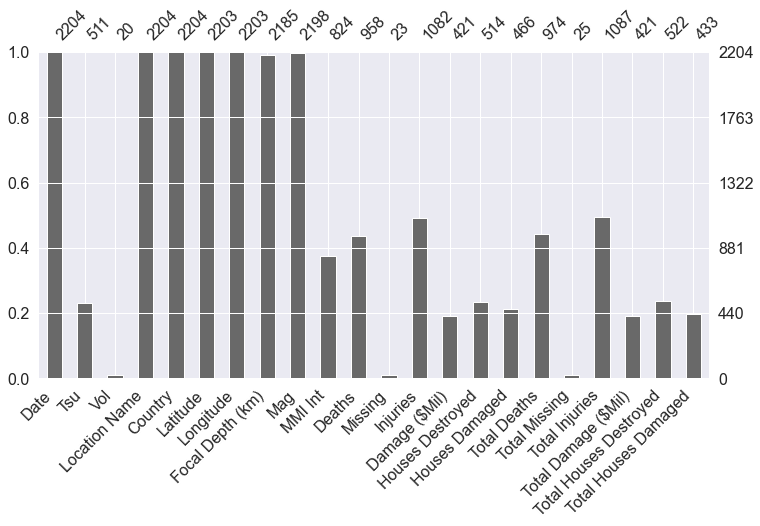

In [6]:
import missingno as msno
msno.bar(df, figsize=(12,6))

> The Bar Chart Shows columns and the number of values not missing

- Over 50% of the data in columns (Vol, Tsu, MMI int, Deaths, Missing, Injuries, Damage, Houses destroyed, House Damaged) are missing

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

#Concat total and percentage using pandas 'pd.concat'
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Vol,2184,99.1
Missing,2181,99.0
Total Missing,2179,98.9
Damage ($Mil),1783,80.9
Total Damage ($Mil),1783,80.9
Total Houses Damaged,1771,80.4
Houses Damaged,1738,78.9
Tsu,1693,76.8
Houses Destroyed,1690,76.7
Total Houses Destroyed,1682,76.3


- Over 15 out of 22 columns in the dataset has over 50% missing values. we choose to drop all missing values, To aviod skewing our results
    

> Drop columns with over 50% missing values

In [8]:
df = df.dropna(thresh = df.shape[0]*0.5, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2204 non-null   object 
 1   Location Name     2204 non-null   object 
 2   Country           2204 non-null   object 
 3   Latitude          2203 non-null   float64
 4   Longitude         2203 non-null   float64
 5   Focal Depth (km)  2185 non-null   float64
 6   Mag               2198 non-null   float64
dtypes: float64(4), object(3)
memory usage: 120.7+ KB


> Change Date to Datetime DataType

In [9]:
df["Date"] = pd.to_datetime(df["Date"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2204 non-null   datetime64[ns]
 1   Location Name     2204 non-null   object        
 2   Country           2204 non-null   object        
 3   Latitude          2203 non-null   float64       
 4   Longitude         2203 non-null   float64       
 5   Focal Depth (km)  2185 non-null   float64       
 6   Mag               2198 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 120.7+ KB


- The Datatypes look better now

## Top 10 Countries with the Highest Earthquake occurence since 1970

In [11]:
df.Country.value_counts().to_frame("Number of Occurences")

,Number of Occurences
CHINA,211
INDONESIA,199
IRAN,153
JAPAN,124
TURKEY,82
...,...
DJIBOUTI,1
JORDAN,1
NORTH CAROLINA,1
ANTIGUA AND BARBUDA; ST KITTS,1


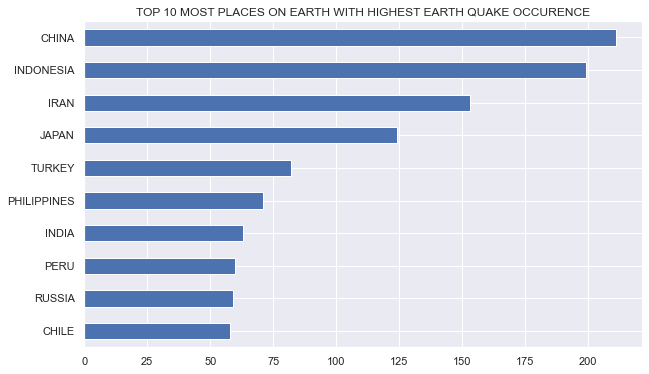

In [142]:
df.Country.value_counts().head(10).sort_values().plot(kind='barh', 
                                     figsize =(10,6),
                                     title="TOP 10 MOST PLACES ON EARTH WITH HIGHEST EARTH QUAKE OCCURENCE")
plt.show()

> The Top 10 Countries with Earthquakes from 1970 to date are:
(China, Indonesia, Iran, Japan, Turkey, Philippines, India, Peru, Russia, Chile)

## Top 10 Time period (Year) with the highest earthquakes

### Year

In [135]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [136]:
df.head(2)

,Date,Location Name,Country,Latitude,Longitude,Focal Depth (km),Mag,year
0,1970-04-01,CHINA: YUNNAN PROVINCE; VIETNAM: HANOI,CHINA,24.1,102.5,31.0,7.8,1970
1,1970-10-01,PHILIPPINES: MINDANAO,PHILIPPINES,6.8,126.7,73.0,7.6,1970


In [137]:
df.year.value_counts().head()

2004    78
2008    77
2003    72
2018    69
2007    67
Name: year, dtype: int64

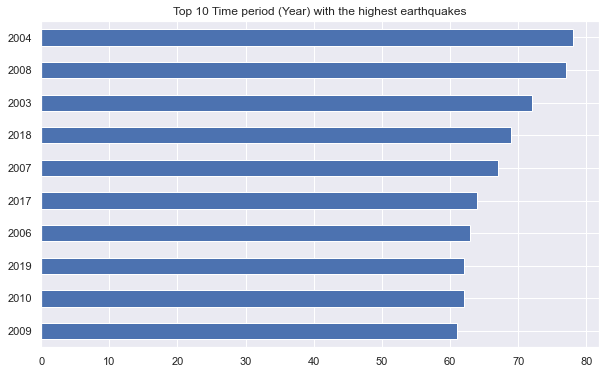

In [138]:
df.year.value_counts().head(10).sort_values().plot(kind='barh', 
                                     figsize =(10,6),
                                     title="Top 10 Time period (Year) with the highest earthquakes")
plt.show()

> The Top 10 time periods with Earthquakes from 1970 to date are:
(2004, 2008, 2003, 2018, 2007, 2017, 2006, 2019, 2010, 2009)

### Month

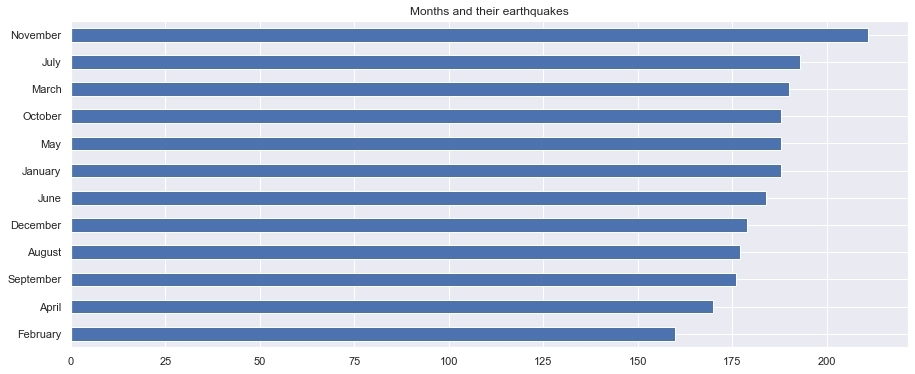

In [139]:
df['Month'] = pd.DatetimeIndex(df['Date']).month_name(locale = 'English')

df.head(2)

df.year.value_counts().head()

df.Month.value_counts().sort_values().plot(kind='barh', 
                                     figsize =(15,6),
                                     title="Months and their earthquakes")
plt.show()



> Novermber has the highest earthquake occurence than any other month

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2204 non-null   datetime64[ns]
 1   Location Name     2204 non-null   object        
 2   Country           2204 non-null   object        
 3   Latitude          2203 non-null   float64       
 4   Longitude         2203 non-null   float64       
 5   Focal Depth (km)  2185 non-null   float64       
 6   Mag               2198 non-null   float64       
 7   year              2204 non-null   int64         
 8   Month             2204 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 155.1+ KB
